In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!unzip '/content/drive/MyDrive/Birds.zip'

Archive:  /content/drive/MyDrive/Birds.zip
   creating: Birds/test_data/
   creating: Birds/test_data/blasti/
  inflating: Birds/test_data/blasti/DSC_6396.jpg  
  inflating: Birds/test_data/blasti/DSC_6397.jpg  
  inflating: Birds/test_data/blasti/DSC_6398.jpg  
  inflating: Birds/test_data/blasti/DSC_6399.jpg  
  inflating: Birds/test_data/blasti/DSC_6400.jpg  
  inflating: Birds/test_data/blasti/DSC_6401.jpg  
  inflating: Birds/test_data/blasti/DSC_6402.jpg  
  inflating: Birds/test_data/blasti/DSC_6403.jpg  
  inflating: Birds/test_data/blasti/DSC_6405.jpg  
  inflating: Birds/test_data/blasti/DSC_6406.jpg  
  inflating: Birds/test_data/blasti/DSC_6407.jpg  
  inflating: Birds/test_data/blasti/DSC_6408.jpg  
  inflating: Birds/test_data/blasti/DSC_6409.jpg  
  inflating: Birds/test_data/blasti/DSC_6410.jpg  
  inflating: Birds/test_data/blasti/DSC_6411.jpg  
   creating: Birds/test_data/bonegl/
  inflating: Birds/test_data/bonegl/DSC_4587.jpg  
  inflating: Birds/test_data/bonegl/D

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
train_path = '/content/Birds/train_data'
test_path = '/content/Birds/test_data'

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 150 images belonging to 16 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 157 images belonging to 16 classes.


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size
)

Epoch 1/10
4/4 [==============================] - 108s 29s/step - loss: 3.2803 - accuracy: 0.0763 - val_loss: 2.7514 - val_accuracy: 0.0078
Epoch 2/10
4/4 [==============================] - 111s 34s/step - loss: 2.6395 - accuracy: 0.1186 - val_loss: 2.7318 - val_accuracy: 0.1562
Epoch 3/10
4/4 [==============================] - 112s 34s/step - loss: 2.6054 - accuracy: 0.2034 - val_loss: 2.6916 - val_accuracy: 0.2109
Epoch 4/10
4/4 [==============================] - 86s 26s/step - loss: 2.4689 - accuracy: 0.1953 - val_loss: 2.7600 - val_accuracy: 0.2031
Epoch 5/10
4/4 [==============================] - 85s 26s/step - loss: 2.4011 - accuracy: 0.1864 - val_loss: 2.7479 - val_accuracy: 0.2109
Epoch 6/10
4/4 [==============================] - 114s 35s/step - loss: 2.3248 - accuracy: 0.2542 - val_loss: 2.8022 - val_accuracy: 0.2969
Epoch 7/10
4/4 [==============================] - 111s 35s/step - loss: 2.2336 - accuracy: 0.3475 - val_loss: 2.6612 - val_accuracy: 0.2812
Epoch 8/10
4/4 [======

In [13]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


5/5 [==============================] - 52s 9s/step - loss: 2.7757 - accuracy: 0.2611
Test loss: 2.775678873062134
Test accuracy: 0.2611464858055115


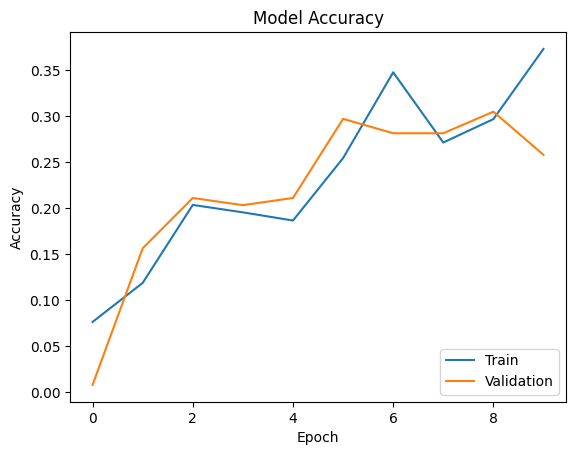

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [17]:
test_images = test_generator.filepaths[:10]
test_labels = test_generator.classes[:10]

In [18]:
test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    shuffle=False
)

Found 157 images belonging to 16 classes.


In [19]:
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
class_labels = list(test_data.class_indices.keys())

16/16 [==============================] - 52s 3s/step


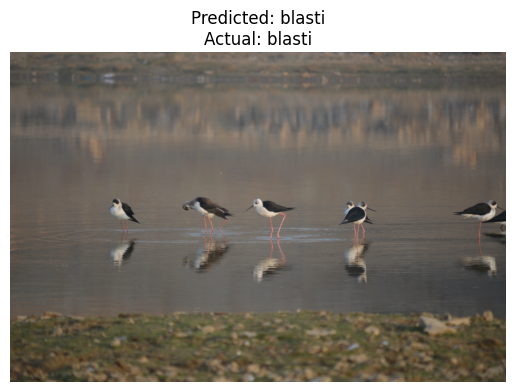

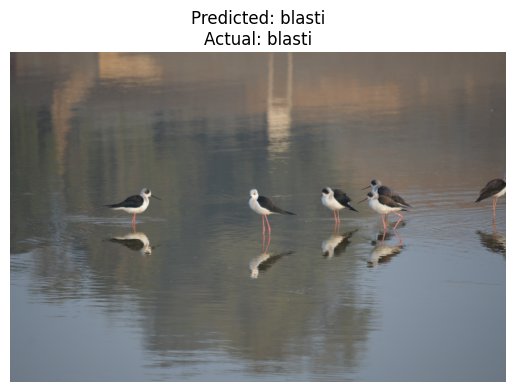

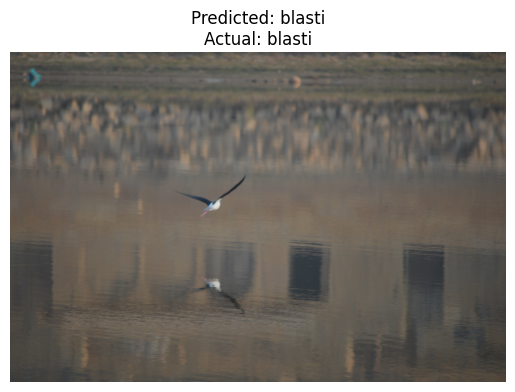

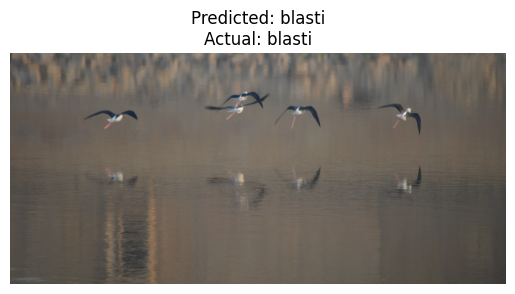

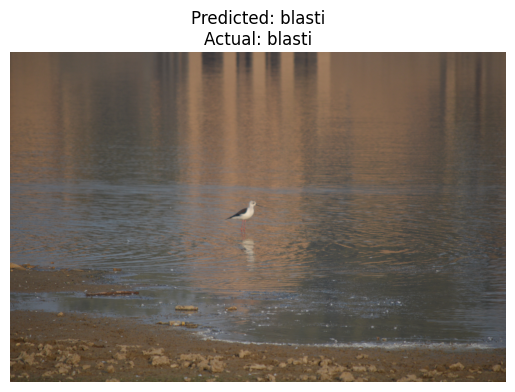

In [27]:
for i in range(0,10,2):
    image = plt.imread(test_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted: {class_labels[predicted_labels[i]]}\nActual: {class_labels[test_labels[i]]}")
    plt.show()